# Prequisites

In [ ]:
!pip install ultralytics
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d tkm22092/indian-number-plate-images
!kaggle datasets download -d vishanktomar/indian-car-dataset-with-label

 99% 1.39G/1.40G [00:15<00:00, 93.3MB/s]
100% 1.40G/1.40G [00:15<00:00, 98.5MB/s]
 99% 1.02G/1.03G [00:13<00:00, 102MB/s]
100% 1.03G/1.03G [00:13<00:00, 82.9MB/s]


In [ ]:
!unzip indian-car-dataset-with-label.zip
!unzip indian-number-plate-images.zip

In [5]:
import os
from tqdm.notebook import tqdm
import cv2
import matplotlib.pyplot as plt
import random

# Data Prep

## NP - 1

In [6]:
def annotation2img(annotation_path, img_folder):
  #annotation_path = "/content/yolo_labels/20230614_150920ll.txt"
  img_path = img_folder + "/" + annotation_path.split("/")[-1].split(".")[0] + ".jpg"
  print(img_path)
  img = cv2.imread(img_path)
  image_height, image_width, _ = img.shape

  text = open(annotation_path, "r")
  text = text.readlines()
  for i in text:
    temp = i.replace("\n", "")
    temp = temp.split(" ")
    class_id = float(temp[0])
    center_x = float(temp[1])
    center_y = float(temp[2])
    width = float(temp[3])
    height = float(temp[4])
    # Convert normalized center coordinates to pixel coordinates
    x_center = int(center_x * image_width)
    y_center = int(center_y * image_height)

    # Convert normalized width and height to half-widths and half-heights (assuming square boxes)
    half_width = int(width * image_width / 2)
    half_height = int(height * image_height / 2)

    # Calculate top-left and bottom-right corners (handle potential out-of-bounds)
    x_min = max(0, x_center - half_width)  # Clamp x_min to 0 for edge cases
    y_min = max(0, y_center - half_height)  # Clamp y_min to 0 for edge cases
    x_max = min(image_width, x_center + half_width)  # Clamp x_max to image width
    y_max = min(image_height, y_center + half_height)  # Clamp y_max to image height

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 4)

  plt.imshow(img)

/content/images/images/20230614_150920ll.jpg


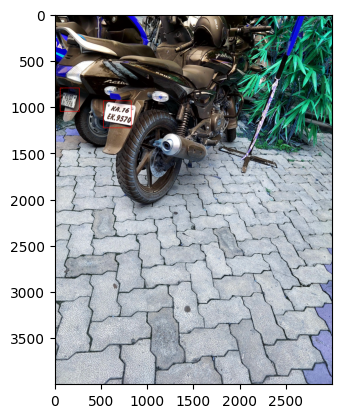

In [7]:
annotation2img("/content/yolo_labels/20230614_150920ll.txt", "/content/images/images")

In [8]:
#Here in the above dataset only number plates are available
#Will be keeping class id '0' as number_plate and '1' as vehicle

#Dataset already has class_id '0' for plates so will copy images and labels to a new folder directly
!mkdir /content/data
!mkdir /content/data/images
!mkdir /content/data/labels

!rm -rf /content/yolo_labels/classes.txt

for i in tqdm(os.listdir("/content/yolo_labels")):
  img_path = "/content/images/images/" + i.split(".")[0] + ".jpg"
  annotation_path = os.path.join("/content/yolo_labels", i)
  temp = open(annotation_path, "r")
  temp = temp.readlines()
  j = temp[0]
  j = j.replace("\n", "")
  j = j.split(" ")
  if(len(j) !=5):
    continue
  #img = cv2.imread(img_path)
  !cp $img_path /content/data/images/
  !cp $annotation_path /content/data/labels/

  0%|          | 0/115 [00:00<?, ?it/s]

In [9]:
len(os.listdir("/content/data/images")), len(os.listdir("/content/data/labels"))

(115, 115)

## NP - 2

/content/data_adjusted/0000000_leftImg8bit.jpg


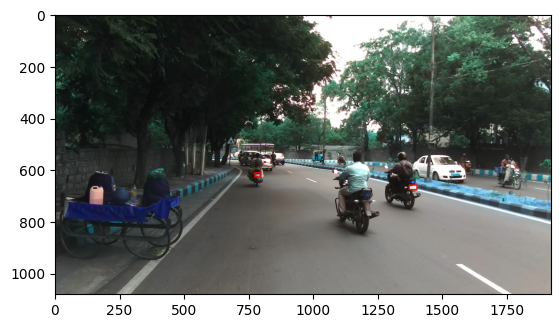

In [ ]:
annotation2img("/content/data_adjusted/0000000_leftImg8bit.txt", "/content/data_adjusted")

In [10]:
#Dataset already has class_id '0' for plates so will copy images and labels to a new folder directly

for i in tqdm(os.listdir("/content/data_adjusted")):
  if(i.split(".")[-1]=="jpg"):
    img_path = "/content/data_adjusted/" + i
    #!cp $img_path /content/data/images/
    img = cv2.imread(img_path)
    annotation_path = "/content/data_adjusted/" + i.split(".")[0] + ".txt"
    temp = open(annotation_path, "r")
    temp = temp.readlines()
    j = temp[0]
    j = j.replace("\n", "")
    j = j.split(" ")
    if(len(j) !=5):
      continue
    cv2.imwrite("/content/data/images/"+i, img)
    !cp $annotation_path /content/data/labels/

  0%|          | 0/3764 [00:00<?, ?it/s]

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp /content/data_adjusted/frame2934_leftImg8bit (2).txt /content/data/labels/'
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp /content/data_adjusted/frame0014_leftImg8bit (2).txt /content/data/labels/'
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp /content/data_adjusted/frame20953_leftImg8bit (2).txt /content/data/labels/'


In [11]:
len(os.listdir("/content/data/images")), len(os.listdir("/content/data/labels"))

(1255, 1252)

## Vehicle - 1

In [15]:
!rm -rf /content/indian-car-dataset-with-label.zip
!rm -rf /content/indian-number-plate-images.zip
!rm -rf /content/top-view-vehicle-detection-image-dataset.zip
!rm -rf /content/data_adjusted
!rm -rf /content/images
!rm -rf /content/yolo_labels

In [12]:
!kaggle datasets download -d ashfakyeafi/road-vehicle-images-dataset

100% 114M/115M [00:00<00:00, 155MB/s] 
100% 115M/115M [00:00<00:00, 133MB/s]


In [13]:
!unzip /content/road-vehicle-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: trafic_data/train/images/Dipto_713_jpg.rf.1505b15a67b6bab4f85101f3da16ec99.jpg  
  inflating: trafic_data/train/images/Dipto_714_jpg.rf.337e462dc0f971f12bf1084be19ace5d.jpg  
  inflating: trafic_data/train/images/Dipto_715_jpg.rf.74af61b7035f49b937f539d8134a8b4b.jpg  
  inflating: trafic_data/train/images/Dipto_716_jpg.rf.51a6249f7025cdbf461730ec7b1c1983.jpg  
  inflating: trafic_data/train/images/Dipto_717_jpg.rf.b646e80d35302dbfac7d99f27930f2f2.jpg  
  inflating: trafic_data/train/images/Dipto_718_jpg.rf.4ea5c29f79bc653ebc6fef6e6242b640.jpg  
  inflating: trafic_data/train/images/Dipto_719_jpg.rf.fa66fe4a73b4e7eb517fc31cac5d3309.jpg  
  inflating: trafic_data/train/images/Dipto_720_jpg.rf.5bf4278246a719c636c6da96005ca669.jpg  
  inflating: trafic_data/train/images/Dipto_721_jpg.rf.328c96710054d7093d8982bed7080f51.jpg  
  inflating: trafic_data/train/images/Dipto_722_jpg.rf.e07fac024b91b363bd65180a727abc99.jpg  
  inflati

In [14]:
for i in tqdm(os.listdir("/content/trafic_data/train/labels")):
  annotation_path = os.path.join("/content/trafic_data/train/labels", i)
  temp = open(annotation_path)
  temp = temp.readlines()
  lis = []
  for j in temp:
    j = j.replace("\n", "")
    j = j.split(" ")
    if(len(j) == 5): #Checking whether the pre defined annotations have the same number of annotation elements or not
      class_id = str(1)
      x_center = str(j[1])
      y_center = str(j[2])
      width = str(j[3])
      height = str(j[4])
      line = class_id + "\t" + x_center + "\t" + y_center + "\t" + width + "\t" + height + "\n"
      lis.append(line)
    new_annotation_path = os.path.join("/content/data/labels",i)
    with open(new_annotation_path, "w") as f:
      for k in lis:
        f.write(k+"\n")
    img_path = os.path.join("/content/trafic_data/train/images", i.replace(".txt", "") + ".jpg")
    new_img_path = os.path.join("/content/data/images", i.replace(".txt", "") + ".jpg")
    #!cp $img_path $new_img_path
    img = cv2.imread(img_path)
    cv2.imwrite(new_img_path, img)

  0%|          | 0/2704 [00:00<?, ?it/s]

In [15]:
for i in tqdm(os.listdir("/content/trafic_data/valid/labels")):
  annotation_path = os.path.join("/content/trafic_data/valid/labels", i)
  temp = open(annotation_path)
  temp = temp.readlines()
  lis = []
  for j in temp:
    j = j.replace("\n", "")
    j = j.split(" ")
    if(len(j) == 5):
      class_id = str(1)
      x_center = str(j[1])
      y_center = str(j[2])
      width = str(j[3])
      height = str(j[4])
      line = class_id + "\t" + x_center + "\t" + y_center + "\t" + width + "\t" + height + "\n"
      lis.append(line)
    new_annotation_path = os.path.join("/content/data/labels",i)
    with open(new_annotation_path, "w") as f:
      for k in lis:
        f.write(k+"\n")
    img_path = os.path.join("/content/trafic_data/valid/images", i.replace(".txt", "") + ".jpg")
    new_img_path = os.path.join("/content/data/images", i.replace(".txt", "") + ".jpg")
    #!cp $img_path $new_img_path
    img = cv2.imread(img_path)
    cv2.imwrite(new_img_path, img)

  0%|          | 0/300 [00:00<?, ?it/s]

In [16]:
len(os.listdir("/content/data/images")), len(os.listdir("/content/data/labels"))

(4257, 4254)

# Yolo Training

In [17]:
#Clean mismatched labels and images if any present

path1 = "/content/data/images"
path2 = "/content/data/labels"

lis1 = []
lis2 = []
for i in tqdm(os.listdir(path1)):
  temp = i.replace(".jpg", "")
  lis1.append(temp)

for i in tqdm(os.listdir(path2)):
  temp = i.replace(".txt", "")
  lis2.append(temp)

if(len(lis1) > len(lis2)):
  for item in lis1:
    if(item not in lis2):
      os.remove(os.path.join(path1, item+".jpg"))

if(len(lis2) > len(lis1)):
  for item in lis2:
    if(item not in lis1):
      os.remove(os.path.join(path2, item+".txt"))

  0%|          | 0/4257 [00:00<?, ?it/s]

  0%|          | 0/4254 [00:00<?, ?it/s]

In [18]:
len(os.listdir("/content/data/images")), len(os.listdir("/content/data/labels"))

(4254, 4254)

In [19]:
print("Number of images are ", len(os.listdir("/content/data/images")))
total_length = len(os.listdir("/content/data/images"))
!mkdir /content/final_data
!mkdir /content/final_data/train
!mkdir /content/final_data/validation
!mkdir /content/final_data/train/images
!mkdir /content/final_data/train/labels
!mkdir /content/final_data/validation/images
!mkdir /content/final_data/validation/labels

Number of images are  4254


In [20]:
#Gotta divide it into training and validation sets

lis = os.listdir("/content/data/images")
lis = random.sample(lis, len(lis)) #Randomize the whole data

count = 0
for i in tqdm(lis):
  img_path = os.path.join("/content/data/images", i)
  annotation_path = os.path.join("/content/data/labels", i.replace(".jpg",".txt"))
  if(count%6 != 0):
    #!cp $img_path /content/final_data/train/images/
    img = cv2.imread(img_path)
    cv2.imwrite("/content/final_data/train/images/"+i, img)
    !cp $annotation_path /content/final_data/train/labels/
  else:
    #!cp $img_path /content/final_data/validation/images/
    cv2.imwrite("/content/final_data/validation/images/"+i, img)
    !cp $annotation_path /content/final_data/validation/labels/
  count += 1

  0%|          | 0/4254 [00:00<?, ?it/s]

In [21]:
print("Number of training images are ", len(os.listdir("/content/final_data/train/images")))
print("Number of Validation images are", len(os.listdir("/content/final_data/validation/images")))

Number of training images are  3545
Number of Validation images are 709


In [ ]:
# Create data.yaml

'''
train: training images absolute path
val: validation images absolute path
nc: number of classes
names: class names in the order you have prepared your data in a list
'''

#Not including any script to create the data.yaml, please create it on your own

'''
train: /content/final_data/train/images
val: /content/final_data/validation/images
nc: 2
classes: ["number_plate", "vehicle"]
'''

'\ntrain: \nval: \nnc: 2\nclasses: ["number_plate", "vehicle"]\n'

## Yolov8

In [1]:
from ultralytics import YOLO

In [2]:
model = YOLO("yolov8m.pt")

In [3]:
model.train(data="/content/data.yaml",
            epochs=35,
            batch=-1,
            device=0)

Ultralytics YOLOv8.1.33 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data.yaml, epochs=35, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

train: Scanning /content/final_data/train/labels.cache... 3545 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3545/3545 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/final_data/train/images/Pias--360-_PNG.rf.8405b0e44009a9300e0a1100ccf7d5b3.jpg: 9 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/final_data/validation/labels.cache... 709 images, 0 backgrounds, 0 corrupt: 100%|██████████| 709/709 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/final_data/validation/images/Pias--359-_PNG.rf.43bcf36efe5cf8c37552d2c45fffea60.jpg: 13 duplicate labels removed


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0004921875), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      9.74G      1.423      1.351      1.228        147        640: 100%|██████████| 169/169 [02:20<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:15<00:00,  1.11it/s]

                   all        709       4234    0.00464    0.00436    0.00308   0.000656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      11.3G       1.55      1.249      1.317        173        640: 100%|██████████| 169/169 [02:14<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.23it/s]

                   all        709       4234    0.00559     0.0117    0.00105   0.000317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      10.1G      1.595      1.293      1.338        143        640: 100%|██████████| 169/169 [02:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:14<00:00,  1.18it/s]


                   all        709       4234    0.00435    0.00474   0.000753   0.000224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35        10G      1.537      1.209      1.308        182        640: 100%|██████████| 169/169 [02:15<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:14<00:00,  1.20it/s]

                   all        709       4234    0.00331    0.00449   0.000572   0.000162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      10.6G      1.501      1.157      1.297        211        640: 100%|██████████| 169/169 [02:16<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:14<00:00,  1.20it/s]


                   all        709       4234    0.00179    0.00269   0.000412   0.000109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      10.4G      1.481      1.096       1.27        113        640: 100%|██████████| 169/169 [02:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.23it/s]


                   all        709       4234    0.00443    0.00256   0.000551   0.000141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      9.98G      1.435      1.051      1.247        192        640: 100%|██████████| 169/169 [02:13<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:14<00:00,  1.15it/s]

                   all        709       4234    0.00268    0.00321   0.000503    0.00013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      10.9G      1.404      1.003      1.219        141        640: 100%|██████████| 169/169 [02:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:14<00:00,  1.21it/s]

                   all        709       4234    0.00341    0.00282   0.000477   0.000125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      10.1G      1.391     0.9813      1.212        128        640: 100%|██████████| 169/169 [02:15<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.23it/s]

                   all        709       4234     0.0032    0.00256   0.000544   0.000167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      10.6G      1.357     0.9463      1.202        179        640: 100%|██████████| 169/169 [02:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:14<00:00,  1.20it/s]

                   all        709       4234    0.00265    0.00256   0.000579   0.000145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35       9.9G      1.335     0.9246      1.197         96        640: 100%|██████████| 169/169 [02:12<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.24it/s]

                   all        709       4234    0.00295    0.00244    0.00077   0.000164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35       9.9G      1.311     0.9027      1.175        175        640: 100%|██████████| 169/169 [02:15<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:14<00:00,  1.18it/s]

                   all        709       4234    0.00329    0.00167   0.000446   9.84e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      10.4G      1.302     0.8746      1.167        231        640: 100%|██████████| 169/169 [02:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.27it/s]

                   all        709       4234    0.00476    0.00205   0.000549   0.000127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      9.92G      1.297     0.8518      1.159        174        640: 100%|██████████| 169/169 [02:15<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:14<00:00,  1.21it/s]

                   all        709       4234    0.00238    0.00256   0.000385   9.39e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      10.8G      1.276     0.8448      1.155        113        640: 100%|██████████| 169/169 [02:13<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.24it/s]

                   all        709       4234    0.00327    0.00167   0.000398   9.78e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35        10G      1.275     0.8312      1.151        164        640: 100%|██████████| 169/169 [02:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.26it/s]

                   all        709       4234      0.003    0.00192   0.000507   0.000135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      9.63G      1.246     0.8042      1.136        211        640: 100%|██████████| 169/169 [02:12<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.22it/s]

                   all        709       4234    0.00222    0.00231   0.000386   9.71e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      9.83G      1.227     0.7872      1.131        153        640: 100%|██████████| 169/169 [02:12<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:14<00:00,  1.20it/s]

                   all        709       4234    0.00298    0.00167   0.000747   0.000185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      10.1G      1.224     0.7756      1.125        215        640: 100%|██████████| 169/169 [02:15<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.23it/s]

                   all        709       4234    0.00252    0.00231   0.000386   9.07e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      10.9G      1.219     0.7678      1.121        245        640: 100%|██████████| 169/169 [02:15<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.23it/s]

                   all        709       4234     0.0038    0.00192   0.000921    0.00016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      9.87G        1.2     0.7609      1.124        158        640: 100%|██████████| 169/169 [02:15<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:14<00:00,  1.20it/s]

                   all        709       4234    0.00228    0.00231   0.000497   0.000118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      9.64G      1.163      0.722      1.097        227        640: 100%|██████████| 169/169 [02:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:15<00:00,  1.07it/s]

                   all        709       4234    0.00381    0.00218   0.000732   0.000122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      9.72G      1.179     0.7206      1.101        142        640: 100%|██████████| 169/169 [02:16<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.25it/s]

                   all        709       4234    0.00283    0.00231   0.000369   9.42e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      9.92G      1.153      0.706      1.085        157        640: 100%|██████████| 169/169 [02:14<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.22it/s]

                   all        709       4234    0.00376    0.00218   0.000417   9.48e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      9.77G      1.142     0.6943       1.08        266        640: 100%|██████████| 169/169 [02:15<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.22it/s]

                   all        709       4234    0.00294    0.00244    0.00113    0.00016


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      9.78G      1.155     0.6869      1.077        155        640: 100%|██████████| 169/169 [02:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:14<00:00,  1.21it/s]

                   all        709       4234    0.00488    0.00231   0.000818   0.000137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      9.71G      1.141     0.6671      1.076         76        640: 100%|██████████| 169/169 [02:09<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.27it/s]

                   all        709       4234    0.00301    0.00256   0.000371   0.000114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35      9.91G      1.119     0.6577      1.066         94        640: 100%|██████████| 169/169 [02:08<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.25it/s]

                   all        709       4234    0.00324    0.00218   0.000376   9.45e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      9.99G      1.111     0.6405      1.062        115        640: 100%|██████████| 169/169 [02:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.27it/s]

                   all        709       4234    0.00365    0.00218   0.000317   7.07e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35      9.16G      1.103     0.6274      1.053         88        640: 100%|██████████| 169/169 [02:08<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.23it/s]

                   all        709       4234    0.00463    0.00231   0.000738   0.000129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      9.93G      1.077     0.6102      1.044        137        640: 100%|██████████| 169/169 [02:09<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.27it/s]

                   all        709       4234    0.00455    0.00205   0.000453      9e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      9.64G      1.074     0.6004      1.039        194        640: 100%|██████████| 169/169 [02:10<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:14<00:00,  1.21it/s]

                   all        709       4234    0.00521    0.00179    0.00092   0.000147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      9.68G      1.054     0.5845      1.034         98        640: 100%|██████████| 169/169 [02:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:14<00:00,  1.20it/s]

                   all        709       4234    0.00444    0.00231   0.000435   9.08e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      9.91G      1.044     0.5717      1.024        130        640: 100%|██████████| 169/169 [02:07<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.24it/s]

                   all        709       4234    0.00411    0.00205   0.000461   9.13e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35        10G      1.028     0.5626      1.016         87        640: 100%|██████████| 169/169 [02:08<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.26it/s]

                   all        709       4234    0.00503    0.00192   0.000389   7.83e-05



35 epochs completed in 1.492 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 52.0MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.1.33 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:18<00:00,  1.12s/it]


                   all        709       4234    0.00463    0.00436    0.00183   0.000406
               class_0        709        334          0          0          0          0
               class_1        709       3900    0.00926    0.00872    0.00366   0.000813
Speed: 0.2ms preprocess, 6.2ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7efaa318dae0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [4]:
from google.colab import files
files.download("/content/runs/detect/train4/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>